In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# genratea some data 
# m=100
# X=np.random.randn(m)*10
# noise=np.random.randn(m)
# Y= X*3 +noise*6
# print(X.mean(),X.std())
# plt.scatter(X,Y)
# plt.show()


In [3]:

def GenerateDataset(m):
    X=np.random.randn(m)*10
    noise=np.random.randn(m)
    y= X*3 +1 +noise*6
    print(X.mean(),X.std())
    return X,y


In [4]:
X,y=GenerateDataset(100)

-0.0042523604509436905 9.9422428317994


In [5]:
X.shape,y.shape


((100,), (100,))

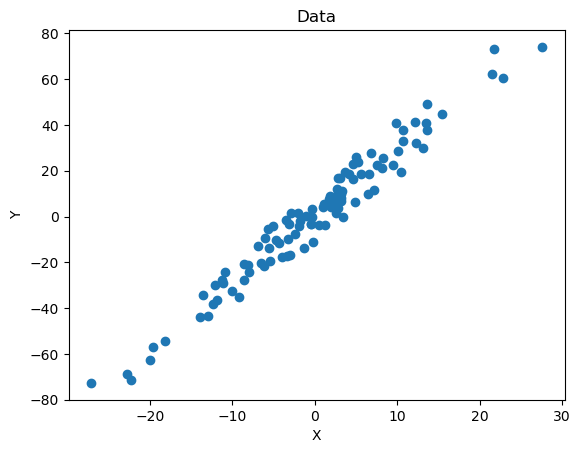

In [6]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y)
    plt.show()
plotData(X,y)

In [7]:
def normaliseData(X):
    X=(X-X.mean())/X.std()
    return X
    

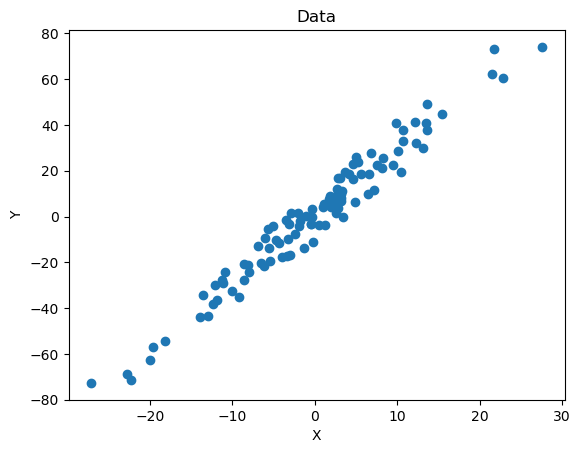

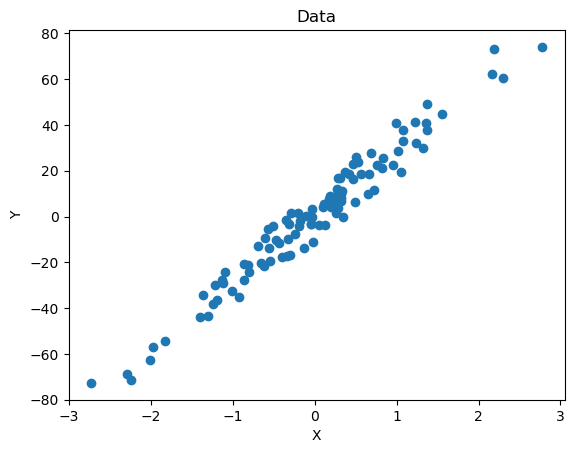

In [8]:
plotData(X,y)
X= normaliseData(X)
plotData(X,y)

In [9]:
def trainTestSplit(X,y, split=0.8):
    m=X.shape[0]
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)
    split=int(m*split)
    XT=data[:split,0]
    yT=data[:split,1]
    Xt=data[split:,0]
    yt=data[split:,1]
    return XT,yT,Xt,yt

In [10]:
XT,yT,Xt,yt=trainTestSplit(X,y)

In [11]:
 print(XT.shape,yT.shape)
 print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


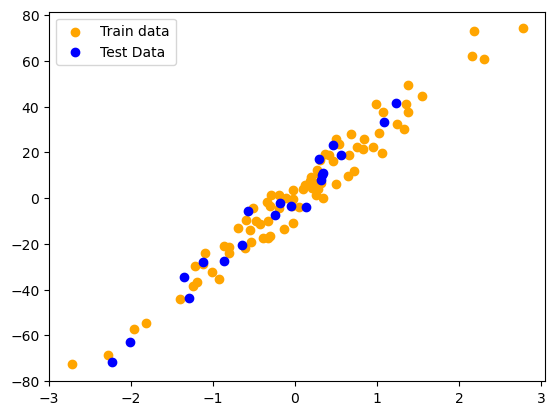

In [12]:
plt.scatter(XT,yT,color='orange',label="Train data")
plt.scatter(Xt,yt,color='blue',label="Test Data")
plt.legend()
plt.show()

In [60]:
# hypothesis
def hypothesis(X,theta):
    return theta[0]+theta[1]*X

def error(X,y,theta):
    m=X.shape[0]
    e=0
    for i in range(m):
        y_i=hypothesis(X[i],theta)
        e=e+ (y[i]-y_i)**2
    return e/(2*m)

def gradient(X,y,theta):
    m=X.shape[0]
    grad=np.zeros((2,1))
    for i in range(m):
        exp=hypothesis(X[i],theta)-y[i]
        grad[0] += (exp)
        grad[1] +=(exp)*X[i]
    return grad/m

def train(X,y,learning_rate=0.1):
    theta=np.zeros((2,1))
    
    maxItrs=100
    error_list =[]
    
    for i in range(maxItrs):
        grad=gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0]=theta[0] -learning_rate * grad[0]
        theta[1]=theta[1] - learning_rate *grad[1]
        
    plt.xlabel("Iteration number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta
        

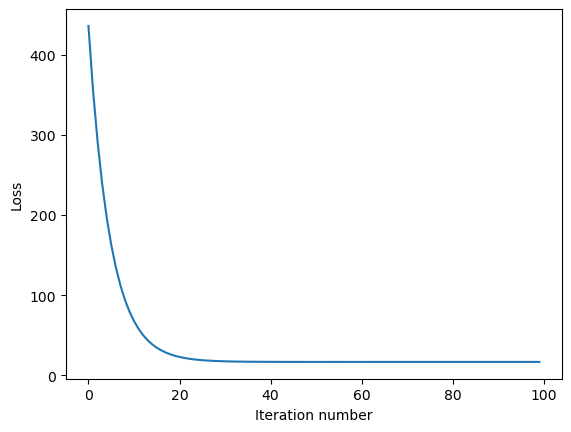

In [62]:
theta=train(X,y)  # the curve is not flattern so we are increse the number of learning rate 0.1

In [64]:
theta

array([[ 0.53695829],
       [28.94484502]])

In [74]:
def predict(X,theta):
    return hypothesis(X,theta)

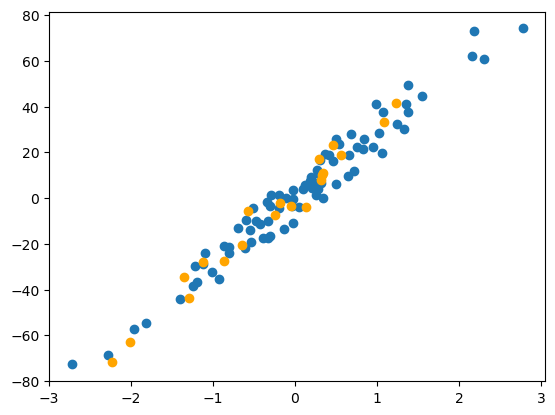

In [76]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color="orange")
plt.show()

In [78]:
yp=predict(Xt,theta)

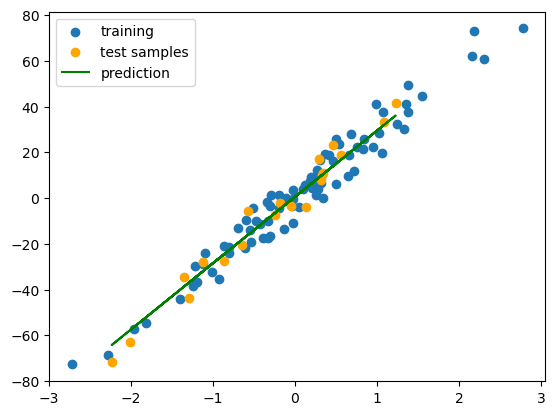

In [94]:
plt.scatter(XT,yT, label="training")
plt.scatter(Xt,yt,color="orange" ,label="test samples")
plt.plot(Xt,yp,color="green", label="prediction")
plt.legend()
plt.show()

In [104]:
# model Evalution
def r2Score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    denom=np.sum((y-ymean)**2)
    return 1-num/denom

r2Score(yt,yp)   # i will check the test and prediction of data it close to 1 (100%) it is 0.96 means it 96% accurate

0.9685448827818381

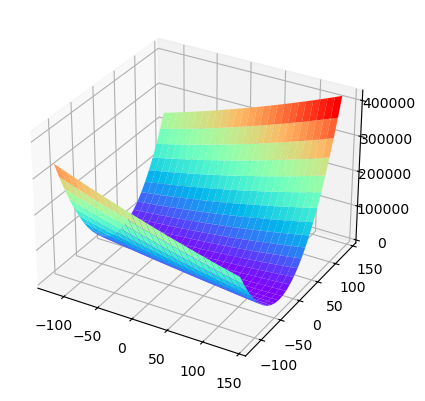

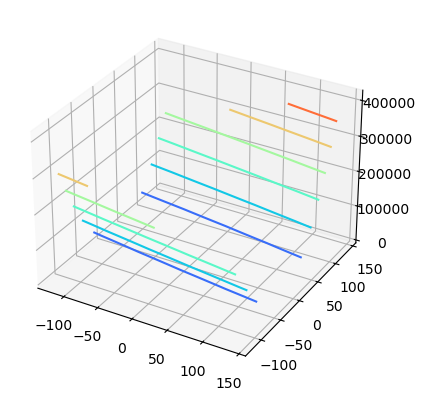

In [124]:
T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i, j] * X + T0[i, j]
        J[i, j] = np.mean((y - yp) ** 2) / 2

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')  # Fixed projection call
axes.plot_surface(T0, T1, J, cmap="rainbow")
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')  # Fixed projection call
axes.contour(T0, T1, J, cmap="rainbow")
plt.show()
